##  PROJECT SUMMARY
  INX Future Inc Employee Performance Analysis
This project aims to analyze and predict employee performance at INX Future Inc. using real company data. The goal was to extract meaningful insights, identify important performance drivers, and build a predictive model to assist in hiring decisions.

###  Objective:
To analyze employee attributes and predict performance ratings, thereby supporting HR decision-making for hiring and promotion strategies.

###  Algorithm & Approach:
- *Model Used:* Random Forest Classifier,Logistic Regression,XGBoost
- *Training Method:* Supervised classification using PerformanceRating as the target.
- *Evaluation Metrics:* Accuracy score and classification report (Precision, Recall, F1-score)

## Feature Selection:
Key features such as Years Since Last Promotion, Last Salary Hike Percentage, and Environment Satisfaction Score were selected based on exploratory data analysis and correlation heatmaps. Categorical variables were encoded, and irrelevant or low-impact features were dropped during preprocessing.



###  Tools & Libraries:
- *Data Handling:* Pandas, NumPy
- *Visualization:* Seaborn, Matplotlib
- *Modeling:* Scikit-learn (RandomForestClassifier, train_test_split, metrics)

###  Outcome:
- Developed a predictive model for employee performance.
- Discovered actionable insights like the impact of timely promotions and departmental differences on performance.
- Provided data-driven recommendations to help improve employee performance and retention.

## Step 1: Data Exploration & Cleaning
The dataset was first explored to understand the features and structure. Unnecessary columns were dropped, and missing values were handled appropriately. Exploratory data analysis (EDA) was performed using visualization libraries like Seaborn and Matplotlib to study the relationship between various features and performance ratings.

## Step 2: Outlier Detection
Using boxplots, outliers were detected in multiple numerical columns. Outliers were particularly noticeable in features like:

YearsSinceLastPromotion

EmpLastSalaryHikePercent

EmpEnvironmentSatisfaction

These outliers were removed using the Interquartile Range (IQR) method to ensure a cleaner dataset and more reliable model results.

## Step 3: Feature Selection
After analysis, the following three features were identified as having the most significant impact on employee performance:

Years Since Last Promotion

Last Salary Hike Percentage

Environment Satisfaction Score

These features were selected for model training as they showed a clear pattern in how they influence performance ratings.

## Step 4: Handling Class Imbalance
The performance rating column was found to be imbalanced, with certain classes being underrepresented. To address this, the SMOTE (Synthetic Minority Over-sampling Technique) method was applied to balance the classes in the training set. This step helped the models learn from all classes more fairly.

## Step 5: Model Building and Tuning
Three classification algorithms were implemented and tested:

Random Forest

Logistic Regression

XGBoost

Each model was trained on the resampled data. Hyperparameter tuning was performed using GridSearchCV to find the best parameter combinations for each algorithm. The train-test split was done with 70% training and 30% testing using a fixed random state to ensure consistency.

## Step 6: Model Evaluation
Each model was evaluated using key classification metrics such as Accuracy, Precision, Recall, and F1 Score. Among all three models, XGBoost gave the best performance, slightly outperforming Random Forest, while Logistic Regression had relatively lower results. The models were compared after applying SMOTE and tuning, ensuring fairness in evaluation.

## Step 7: Insights & Recommendations
Based on the analysis, several actionable recommendations were made:

Promote employees more regularly to keep them motivated, as time since last promotion was linked with better performance.

Link salary hikes more closely to performance, as employees with higher hikes generally performed better.

Improve the work environment based on employee feedback, as satisfaction in this area strongly influenced performance.

Use the trained XGBoost model to assess and filter candidates during the hiring process.

Provide extra training and support to departments that had lower average performance scores.

# Final Outcome
This end-to-end project successfully identified key performance indicators, balanced the dataset, and trained optimized models — with XGBoost chosen as the best performer. These insights and predictions can now help INX Future Inc. make smarter HR and hiring decisions based on data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv(r"C:\Users\arsha\Downloads\INX_Future_Inc_Employee_Performance_CDS_Project2_Data_V1.8.csv")

In [3]:
df

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,...,4,10,2,2,10,7,0,8,No,3
1,E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,...,4,20,2,3,7,7,1,7,No,3
2,E1001007,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,...,3,20,2,3,18,13,1,12,No,4
3,E1001009,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,...,2,23,2,2,21,6,12,6,No,3
4,E1001010,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,...,4,10,1,3,2,2,2,2,No,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,E100992,27,Female,Medical,Divorced,Sales,Sales Executive,Travel_Frequently,3,1,...,2,6,3,3,6,5,0,4,No,4
1196,E100993,37,Male,Life Sciences,Single,Development,Senior Developer,Travel_Rarely,10,2,...,1,4,2,3,1,0,0,0,No,3
1197,E100994,50,Male,Medical,Married,Development,Senior Developer,Travel_Rarely,28,1,...,3,20,3,3,20,8,3,8,No,3
1198,E100995,34,Female,Medical,Single,Data Science,Data Scientist,Travel_Rarely,9,3,...,2,9,3,4,8,7,7,7,No,3


In [4]:
df.head()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,...,4,10,2,2,10,7,0,8,No,3
1,E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,...,4,20,2,3,7,7,1,7,No,3
2,E1001007,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,...,3,20,2,3,18,13,1,12,No,4
3,E1001009,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,...,2,23,2,2,21,6,12,6,No,3
4,E1001010,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,...,4,10,1,3,2,2,2,2,No,3


In [5]:
df.tail()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
1195,E100992,27,Female,Medical,Divorced,Sales,Sales Executive,Travel_Frequently,3,1,...,2,6,3,3,6,5,0,4,No,4
1196,E100993,37,Male,Life Sciences,Single,Development,Senior Developer,Travel_Rarely,10,2,...,1,4,2,3,1,0,0,0,No,3
1197,E100994,50,Male,Medical,Married,Development,Senior Developer,Travel_Rarely,28,1,...,3,20,3,3,20,8,3,8,No,3
1198,E100995,34,Female,Medical,Single,Data Science,Data Scientist,Travel_Rarely,9,3,...,2,9,3,4,8,7,7,7,No,3
1199,E100998,24,Female,Life Sciences,Single,Sales,Sales Executive,Travel_Rarely,3,2,...,1,4,3,3,2,2,2,0,Yes,2


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   EmpNumber                     1200 non-null   object
 1   Age                           1200 non-null   int64 
 2   Gender                        1200 non-null   object
 3   EducationBackground           1200 non-null   object
 4   MaritalStatus                 1200 non-null   object
 5   EmpDepartment                 1200 non-null   object
 6   EmpJobRole                    1200 non-null   object
 7   BusinessTravelFrequency       1200 non-null   object
 8   DistanceFromHome              1200 non-null   int64 
 9   EmpEducationLevel             1200 non-null   int64 
 10  EmpEnvironmentSatisfaction    1200 non-null   int64 
 11  EmpHourlyRate                 1200 non-null   int64 
 12  EmpJobInvolvement             1200 non-null   int64 
 13  EmpJobLevel       

In [7]:
df.describe()

,Age,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,PerformanceRating
count,1200.000000,1200.000000,1200.00000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000
mean,36.918333,9.165833,2.89250,2.715833,65.981667,2.731667,2.067500,2.732500,2.665000,15.222500,2.725000,11.330000,2.785833,2.744167,7.077500,4.291667,2.194167,4.105000,2.948333
std,9.087289,8.176636,1.04412,1.090599,20.211302,0.707164,1.107836,1.100888,2.469384,3.625918,1.075642,7.797228,1.263446,0.699374,6.236899,3.613744,3.221560,3.541576,0.518866
min,18.000000,1.000000,1.00000,1.000000,30.000000,1.000000,1.000000,1.000000,0.000000,11.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000
25%,30.000000,2.000000,2.00000,2.000000,48.000000,2.000000,1.000000,2.000000,1.000000,12.000000,2.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,3.000000
50%,36.000000,7.000000,3.00000,3.000000,66.000000,3.000000,2.000000,3.000000,2.000000,14.000000,3.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000,3.000000
75%,43.000000,14.000000,4.00000,4.000000,83.000000,3.000000,3.000000,4.000000,4.000000,18.000000,4.000000,15.000000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000,3.000000
max,60.000000,29.000000,5.00000,4.000000,100.000000,4.000000,5.000000,4.000000,9.000000,25.000000,4.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000,4.000000


In [8]:
df.shape

(1200, 28)

## DATA CLEANING & EDA

In [9]:
df.isnull().sum()

EmpNumber                       0
Age                             0
Gender                          0
EducationBackground             0
MaritalStatus                   0
EmpDepartment                   0
EmpJobRole                      0
BusinessTravelFrequency         0
DistanceFromHome                0
EmpEducationLevel               0
EmpEnvironmentSatisfaction      0
EmpHourlyRate                   0
EmpJobInvolvement               0
EmpJobLevel                     0
EmpJobSatisfaction              0
NumCompaniesWorked              0
OverTime                        0
EmpLastSalaryHikePercent        0
EmpRelationshipSatisfaction     0
TotalWorkExperienceInYears      0
TrainingTimesLastYear           0
EmpWorkLifeBalance              0
ExperienceYearsAtThisCompany    0
ExperienceYearsInCurrentRole    0
YearsSinceLastPromotion         0
YearsWithCurrManager            0
Attrition                       0
PerformanceRating               0
dtype: int64

In [10]:
df.isnull().values.any()

np.False_

In [11]:
df.duplicated().sum()

np.int64(0)

In [12]:
df.select_dtypes(include='object').nunique()

EmpNumber                  1200
Gender                        2
EducationBackground           6
MaritalStatus                 3
EmpDepartment                 6
EmpJobRole                   19
BusinessTravelFrequency       3
OverTime                      2
Attrition                     2
dtype: int64

In [13]:
df.select_dtypes(include=['int64', 'float64']).columns

Index(['Age', 'DistanceFromHome', 'EmpEducationLevel',
       'EmpEnvironmentSatisfaction', 'EmpHourlyRate', 'EmpJobInvolvement',
       'EmpJobLevel', 'EmpJobSatisfaction', 'NumCompaniesWorked',
       'EmpLastSalaryHikePercent', 'EmpRelationshipSatisfaction',
       'TotalWorkExperienceInYears', 'TrainingTimesLastYear',
       'EmpWorkLifeBalance', 'ExperienceYearsAtThisCompany',
       'ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'PerformanceRating'],
      dtype='object')

In [14]:
df.select_dtypes(include=['object', 'category']).columns

Index(['EmpNumber', 'Gender', 'EducationBackground', 'MaritalStatus',
       'EmpDepartment', 'EmpJobRole', 'BusinessTravelFrequency', 'OverTime',
       'Attrition'],
      dtype='object')

In [15]:
df['EmpDepartment'].unique()

array(['Sales', 'Human Resources', 'Development', 'Data Science',
       'Research & Development', 'Finance'], dtype=object)

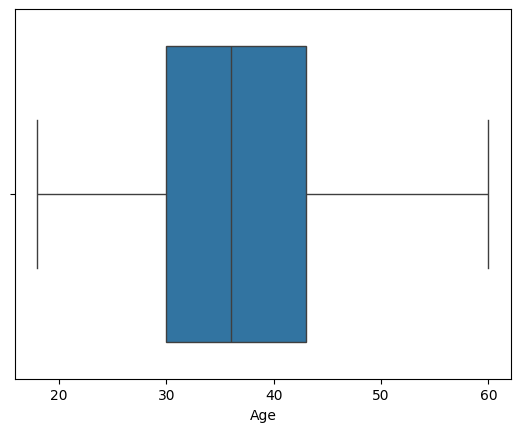

In [16]:
sns.boxplot(x=df['Age'])
plt.show()

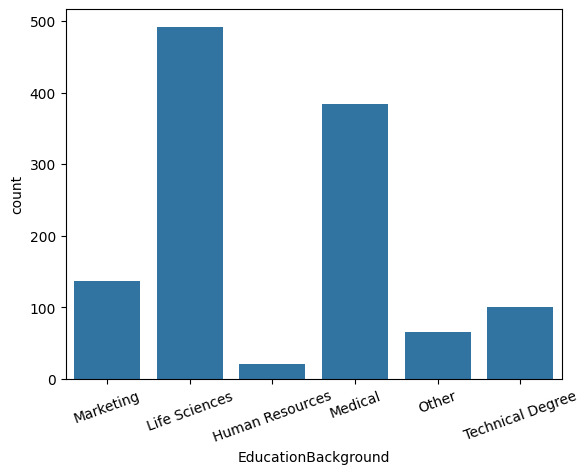

In [17]:
sns.countplot(data=df, x='EducationBackground')
plt.xticks(rotation=20)
plt.show()

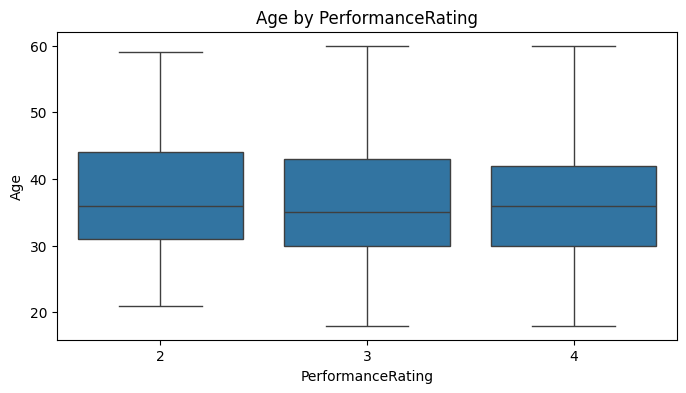

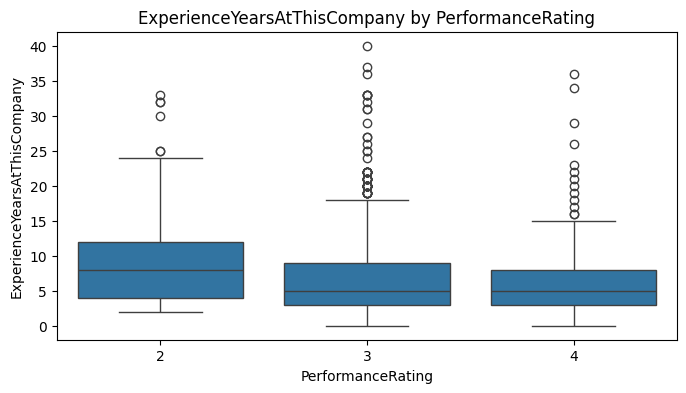

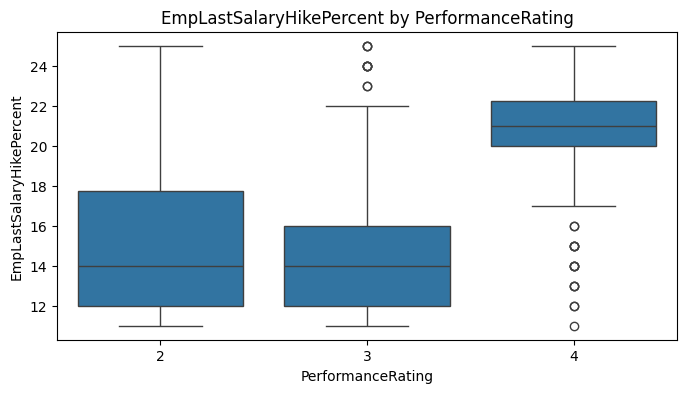

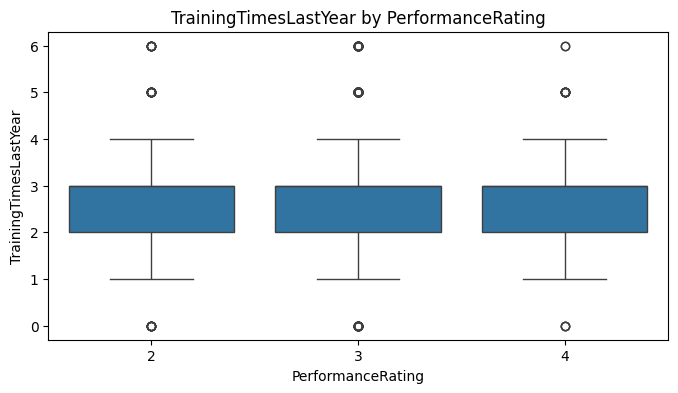

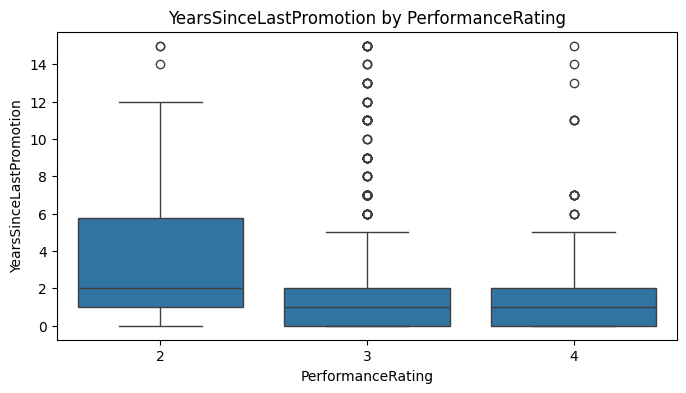

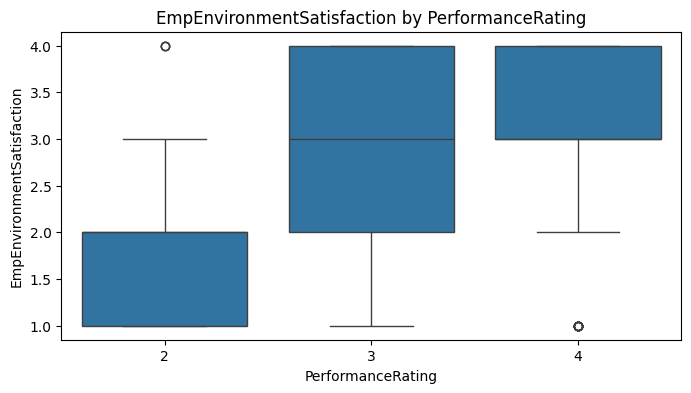

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

numerical_cols = ['Age','ExperienceYearsAtThisCompany',
                  'EmpLastSalaryHikePercent', 'TrainingTimesLastYear',
                  'YearsSinceLastPromotion','EmpEnvironmentSatisfaction']

for col in numerical_cols:
    plt.figure(figsize=(8,4))
    sns.boxplot(x='PerformanceRating', y=col, data=df)
    plt.title(f'{col} by PerformanceRating')
    plt.show()

In [19]:
#experienceyearsatthiscompany,EmplastSalaryHikePercent

In [20]:
def cap_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df[col] = df[col].clip(lower, upper)
    print(f"Outliers capped in: {col}")

# Apply to the 3 important columns
important_cols = ['YearsSinceLastPromotion', 'EmpLastSalaryHikePercent', 'EmpEnvironmentSatisfaction']

for col in important_cols:
    cap_outliers(df,col)

Outliers capped in: YearsSinceLastPromotion
Outliers capped in: EmpLastSalaryHikePercent
Outliers capped in: EmpEnvironmentSatisfaction


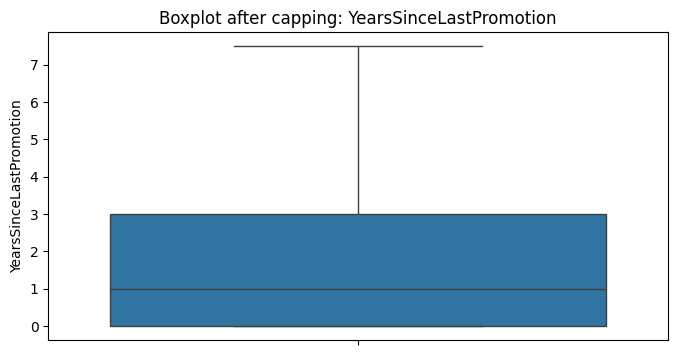

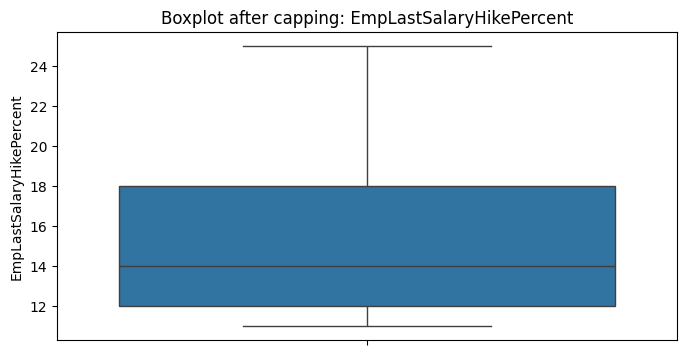

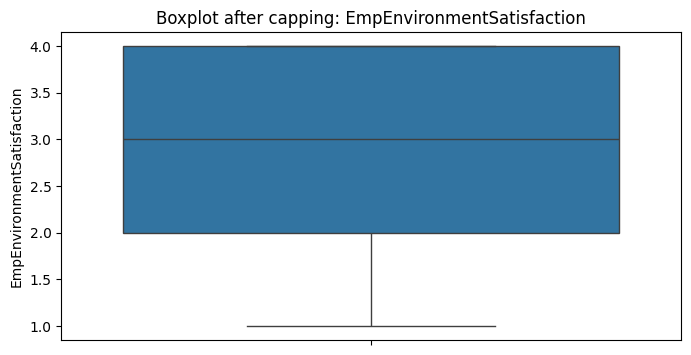

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

for col in important_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot after capping: {col}')
    plt.show()   # Make sure these are normal spaces!


In [22]:
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})

In [23]:
# Exclude EmpNumber or any non-numeric column
df = df.drop(columns=['EmpNumber'])

In [24]:
df

,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,4,...,4,10,2,2,10,7,0.0,8,0,3
1,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,4,...,4,20,2,3,7,7,1.0,7,0,3
2,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,4,...,3,20,2,3,18,13,1.0,12,0,4
3,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,2,...,2,23,2,2,21,6,7.5,6,0,3
4,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,1,...,4,10,1,3,2,2,2.0,2,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,27,Female,Medical,Divorced,Sales,Sales Executive,Travel_Frequently,3,1,4,...,2,6,3,3,6,5,0.0,4,0,4
1196,37,Male,Life Sciences,Single,Development,Senior Developer,Travel_Rarely,10,2,4,...,1,4,2,3,1,0,0.0,0,0,3
1197,50,Male,Medical,Married,Development,Senior Developer,Travel_Rarely,28,1,4,...,3,20,3,3,20,8,3.0,8,0,3
1198,34,Female,Medical,Single,Data Science,Data Scientist,Travel_Rarely,9,3,4,...,2,9,3,4,8,7,7.0,7,0,3


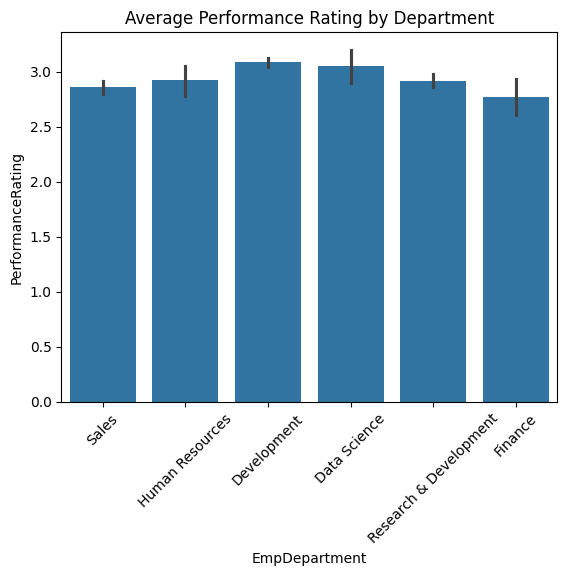

EmpDepartment
Data Science              3.050000
Development               3.085873
Finance                   2.775510
Human Resources           2.925926
Research & Development    2.921283
Sales                     2.860590
Name: PerformanceRating, dtype: float64


In [25]:
# Barplot: avg performance by department
sns.barplot(x='EmpDepartment', y='PerformanceRating', data=df)
plt.xticks(rotation=45)
plt.title('Average Performance Rating by Department')
plt.show()

# Grouped summary
print(df.groupby('EmpDepartment')['PerformanceRating'].mean())


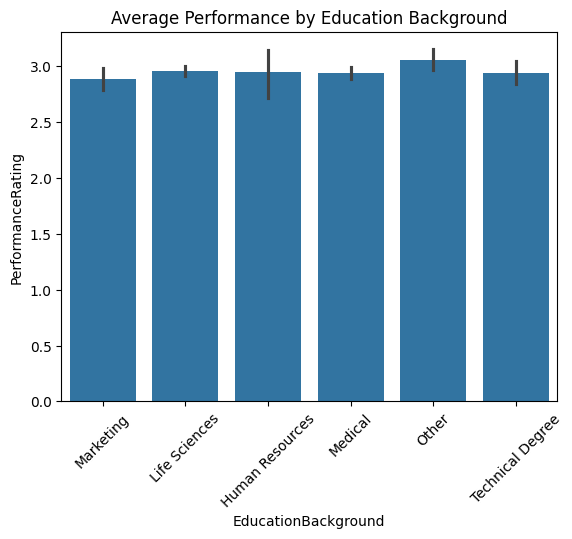

In [26]:
sns.barplot(x='EducationBackground', y='PerformanceRating', data=df)
plt.xticks(rotation=45)
plt.title('Average Performance by Education Background')
plt.show()


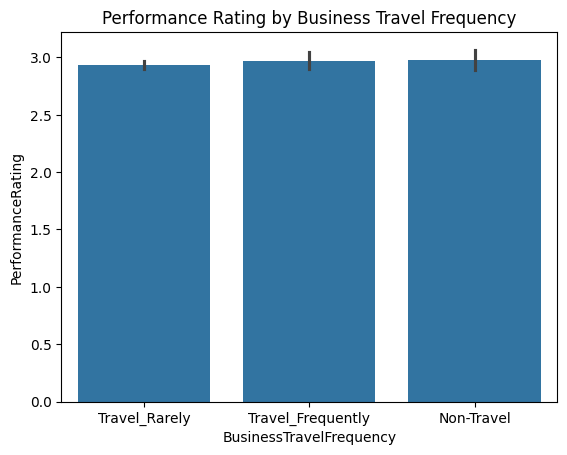

In [27]:
sns.barplot(x='BusinessTravelFrequency', y='PerformanceRating', data=df)
plt.title('Performance Rating by Business Travel Frequency')
plt.show()


In [28]:
df_numeric = df.select_dtypes(include='number')

corr_matrix = df_numeric.corr()

corr_matrix


,Age,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
Age,1.000000,0.020937,0.207313,0.013814,0.062867,0.027216,0.509139,-0.002436,0.284408,-0.006105,0.049749,0.680886,-0.016053,-0.019563,0.318852,0.217163,0.204328,0.205098,-0.189317,-0.040164
DistanceFromHome,0.020937,1.000000,0.045856,-0.017719,0.013730,0.003231,0.017270,-0.003036,-0.021411,0.044974,-0.009509,0.027306,-0.032082,-0.044788,0.021908,0.019898,0.021456,0.017860,0.063248,-0.046142
EmpEducationLevel,0.207313,0.045856,1.000000,-0.037103,0.014095,0.027544,0.100734,0.000357,0.128674,0.002358,-0.016690,0.151062,-0.013674,0.010276,0.076332,0.066672,0.058112,0.088988,-0.049118,0.020529
EmpEnvironmentSatisfaction,0.013814,-0.017719,-0.037103,1.000000,-0.049501,0.004865,-0.008272,-0.004319,0.017270,-0.047271,-0.010504,-0.012894,0.001192,-0.000262,-0.000561,0.025491,0.011969,-0.011702,-0.123490,0.395561
EmpHourlyRate,0.062867,0.013730,0.014095,-0.049501,1.000000,0.054741,-0.018606,-0.066417,0.040484,-0.015934,0.008783,0.026034,-0.024160,0.016189,-0.000399,-0.011871,-0.025872,-0.004576,-0.026313,-0.043116
EmpJobInvolvement,0.027216,0.003231,0.027544,0.004865,0.054741,1.000000,-0.034349,-0.005501,0.018211,-0.001742,0.018037,-0.028851,-0.025168,-0.014129,-0.039720,0.002910,-0.004712,0.012924,-0.153360,-0.010539
EmpJobLevel,0.509139,0.017270,0.100734,-0.008272,-0.018606,-0.034349,1.000000,-0.011853,0.127477,-0.020975,0.002992,0.784229,-0.000389,0.049218,0.540377,0.399235,0.320070,0.374872,-0.175763,-0.076632
EmpJobSatisfaction,-0.002436,-0.003036,0.000357,-0.004319,-0.066417,-0.005501,-0.011853,1.000000,-0.049865,0.031847,-0.022028,-0.026824,-0.028031,-0.018548,0.001807,0.002018,-0.002238,-0.022096,-0.081783,0.000606
NumCompaniesWorked,0.284408,-0.021411,0.128674,0.017270,0.040484,0.018211,0.127477,-0.049865,1.000000,-0.011788,0.057917,0.221505,-0.050817,0.002489,-0.129797,-0.097271,-0.044425,-0.109937,0.037643,0.020980
EmpLastSalaryHikePercent,-0.006105,0.044974,0.002358,-0.047271,-0.015934,-0.001742,-0.020975,0.031847,-0.011788,1.000000,-0.042892,-0.005933,-0.013439,-0.017001,-0.019830,-0.004957,-0.031267,-0.007666,-0.009448,0.333722


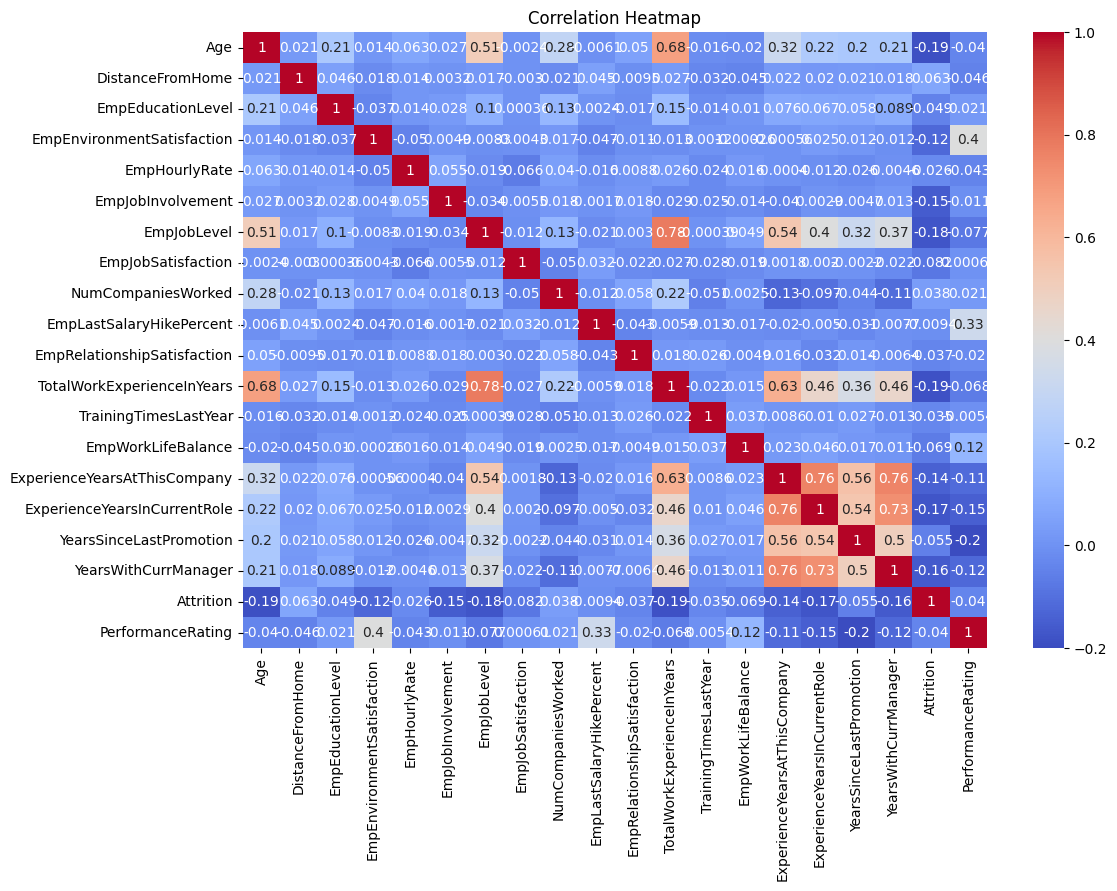

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# Only numeric cols
corr = df.select_dtypes(include=['int64', 'float64']).corr()

plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


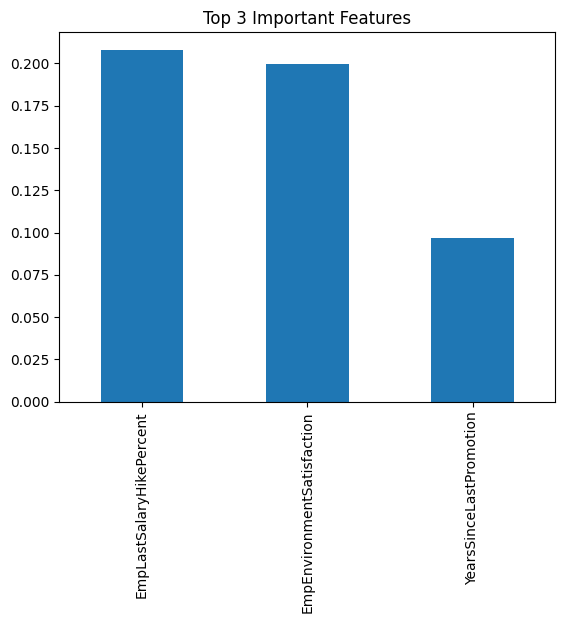

In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

# Prepare features and target
X = df.drop('PerformanceRating', axis=1)
y = df['PerformanceRating']

# Encode categorical features
X_encoded = X.copy()
for col in X_encoded.select_dtypes(include=['object']):
    X_encoded[col] = LabelEncoder().fit_transform(X_encoded[col].astype(str))

# Train Random Forest
model = RandomForestClassifier()
model.fit(X_encoded, y)

# Feature importances
importances = pd.Series(model.feature_importances_, index=X_encoded.columns)
top_3 = importances.sort_values(ascending=False).head(3)
top_3.plot(kind='bar', title='Top 3 Important Features')
plt.show()

In [31]:
X=df[['YearsSinceLastPromotion','EmpLastSalaryHikePercent','EmpEnvironmentSatisfaction']]
y=df['PerformanceRating']

## Logistic regression

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
model2 = LogisticRegression(random_state=42)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)
model2.fit(X_train,y_train)
y_pred2=model2.predict(X_test)

In [33]:
X_train

,YearsSinceLastPromotion,EmpLastSalaryHikePercent,EmpEnvironmentSatisfaction
522,2.0,19,3
213,0.0,17,1
120,0.0,17,4
917,1.0,13,4
1067,2.0,16,3
...,...,...,...
1044,0.0,11,2
1095,4.0,11,2
1130,0.0,15,2
860,5.0,12,3


In [34]:
y_train

522     3
213     3
120     3
917     3
1067    3
       ..
1044    3
1095    2
1130    3
860     3
1126    3
Name: PerformanceRating, Length: 840, dtype: int64

In [35]:
y_pred2

array([2, 2, 3, 3, 3, 3, 2, 3, 2, 4, 3, 4, 3, 2, 3, 3, 3, 3, 4, 4, 3, 3,
       3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 2, 3, 4, 3,
       3, 3, 3, 2, 3, 3, 2, 2, 3, 3, 3, 3, 3, 3, 3, 2, 2, 3, 3, 3, 3, 2,
       3, 4, 3, 2, 2, 3, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 3, 3, 4,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 4, 3, 3, 2, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2,
       3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 4, 3, 3, 3, 4, 3, 3, 3, 3, 3, 3,
       2, 3, 3, 3, 3, 3, 2, 3, 3, 2, 3, 2, 3, 3, 3, 3, 2, 4, 2, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 4, 4, 3, 4, 3, 2, 3, 3, 3, 3, 4, 3, 3, 3, 3, 3, 2, 3,
       3, 3, 3, 3, 3, 3, 2, 3, 2, 3, 2, 3, 4, 3, 3, 2, 4, 3, 3, 4, 4, 3,
       2, 3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 3, 3,
       3, 3, 2, 4, 4, 3, 3, 3, 2, 2, 3, 3, 3, 3, 3,

In [36]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score,f1_score
# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred2))

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred2))

#accuracy
print("Accuracy:",accuracy_score(y_test,y_pred2))

#f1_score
print("f1 score:",f1_score(y_test,y_pred2,average="weighted"))

Confusion Matrix:
[[ 29  18   2]
 [ 18 244   6]
 [  1  15  27]]

Classification Report:
              precision    recall  f1-score   support

           2       0.60      0.59      0.60        49
           3       0.88      0.91      0.90       268
           4       0.77      0.63      0.69        43

    accuracy                           0.83       360
   macro avg       0.75      0.71      0.73       360
weighted avg       0.83      0.83      0.83       360

Accuracy: 0.8333333333333334
f1 score: 0.830663450120085


## Random Forest

In [37]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [38]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(random_state=42)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

In [39]:
X_train

,YearsSinceLastPromotion,EmpLastSalaryHikePercent,EmpEnvironmentSatisfaction
522,2.0,19,3
213,0.0,17,1
120,0.0,17,4
917,1.0,13,4
1067,2.0,16,3
...,...,...,...
1044,0.0,11,2
1095,4.0,11,2
1130,0.0,15,2
860,5.0,12,3


In [40]:
y_train

522     3
213     3
120     3
917     3
1067    3
       ..
1044    3
1095    2
1130    3
860     3
1126    3
Name: PerformanceRating, Length: 840, dtype: int64

In [41]:
y_pred

array([2, 2, 3, 3, 3, 3, 2, 3, 2, 3, 3, 4, 3, 2, 2, 2, 3, 3, 4, 2, 2, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 3, 3, 3, 2, 3, 4, 3,
       3, 3, 3, 2, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 3, 3, 3, 3, 2,
       3, 4, 3, 3, 2, 3, 4, 4, 3, 2, 3, 3, 2, 3, 2, 3, 3, 3, 4, 3, 3, 3,
       3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 3, 3, 3, 4,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3,
       3, 3, 3, 3, 4, 3, 3, 2, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2,
       3, 3, 3, 4, 3, 4, 3, 2, 2, 3, 3, 4, 3, 2, 3, 4, 3, 3, 3, 3, 3, 3,
       2, 2, 3, 3, 3, 3, 2, 3, 3, 2, 3, 2, 3, 3, 3, 3, 2, 4, 2, 3, 3, 3,
       4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 2, 3, 3, 3, 4, 3, 3, 3, 2, 3, 3, 3, 3, 4, 3, 3, 2, 2, 3, 2, 3,
       2, 3, 3, 3, 2, 3, 2, 3, 2, 3, 2, 3, 4, 3, 3, 2, 3, 3, 3, 3, 4, 3,
       2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 2, 3, 3,
       3, 3, 2, 3, 3, 3, 3, 3, 2, 2, 3, 3, 2, 3, 3,

In [42]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score,f1_score
# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

#accuracy
print("Accuracy:",accuracy_score(y_test,y_pred))

#f1-score
print("f1 score:",f1_score(y_test,y_pred,average="weighted"))



Confusion Matrix:
[[ 34  14   1]
 [ 29 238   1]
 [  1  15  27]]

Classification Report:
              precision    recall  f1-score   support

           2       0.53      0.69      0.60        49
           3       0.89      0.89      0.89       268
           4       0.93      0.63      0.75        43

    accuracy                           0.83       360
   macro avg       0.78      0.74      0.75       360
weighted avg       0.85      0.83      0.83       360

Accuracy: 0.8305555555555556
f1 score: 0.8338377374355581


## XGBoost

In [43]:
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score

# Step 1: Encode the target labels
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

# Step 2: Train XGBoost with encoded labels
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_model.fit(X_train, y_train_encoded)

# Step 3: Predict
xgb_pred_encoded = xgb_model.predict(X_test)

# Step 4 (Optional): Convert predictions back to original labels
xgb_pred_original = le.inverse_transform(xgb_pred_encoded)

# Step 5: Evaluate using original labels
print("Confusion Matrix:")
print(confusion_matrix(y_test, xgb_pred_original))

print("\nClassification Report:")
print(classification_report(y_test, xgb_pred_original))

print("Accuracy:", accuracy_score(y_test, xgb_pred_original))
print("F1 Score (macro):", f1_score(y_test, xgb_pred_original, average='macro'))
print("F1 Score (weighted):", f1_score(y_test, xgb_pred_original, average='weighted'))


Confusion Matrix:
[[ 35  13   1]
 [ 30 235   3]
 [  1  15  27]]

Classification Report:
              precision    recall  f1-score   support

           2       0.53      0.71      0.61        49
           3       0.89      0.88      0.89       268
           4       0.87      0.63      0.73        43

    accuracy                           0.82       360
   macro avg       0.76      0.74      0.74       360
weighted avg       0.84      0.82      0.83       360

Accuracy: 0.825
F1 Score (macro): 0.7411825974832608
F1 Score (weighted): 0.8289368648924041


In [44]:
y_pred

array([2, 2, 3, 3, 3, 3, 2, 3, 2, 3, 3, 4, 3, 2, 2, 2, 3, 3, 4, 2, 2, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 3, 3, 3, 2, 3, 4, 3,
       3, 3, 3, 2, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 3, 3, 3, 3, 2,
       3, 4, 3, 3, 2, 3, 4, 4, 3, 2, 3, 3, 2, 3, 2, 3, 3, 3, 4, 3, 3, 3,
       3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 3, 3, 3, 4,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3,
       3, 3, 3, 3, 4, 3, 3, 2, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2,
       3, 3, 3, 4, 3, 4, 3, 2, 2, 3, 3, 4, 3, 2, 3, 4, 3, 3, 3, 3, 3, 3,
       2, 2, 3, 3, 3, 3, 2, 3, 3, 2, 3, 2, 3, 3, 3, 3, 2, 4, 2, 3, 3, 3,
       4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 2, 3, 3, 3, 4, 3, 3, 3, 2, 3, 3, 3, 3, 4, 3, 3, 2, 2, 3, 2, 3,
       2, 3, 3, 3, 2, 3, 2, 3, 2, 3, 2, 3, 4, 3, 3, 2, 3, 3, 3, 3, 4, 3,
       2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 2, 3, 3,
       3, 3, 2, 3, 3, 3, 3, 3, 2, 2, 3, 3, 2, 3, 3,

In [45]:
print("Ramdom Forest Accuracy:",accuracy_score(y_test,y_pred))
print("Logistic Regression Accuracy:",accuracy_score(y_test,y_pred2))
print("XGBoost Accuracy:",accuracy_score(y_test, xgb_pred_original))

Ramdom Forest Accuracy: 0.8305555555555556
Logistic Regression Accuracy: 0.8333333333333334
XGBoost Accuracy: 0.825


## SMOTE and  Hyperparameter Tuning

In [46]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV, train_test_split

In [47]:
# Assuming you already have X_train, y_train
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
print("Original dataset shape:", y_train.value_counts())
print("Resampled dataset shape:", y_train_resampled.value_counts())

Original dataset shape: PerformanceRating
3    606
2    145
4     89
Name: count, dtype: int64
Resampled dataset shape: PerformanceRating
3    606
2    606
4    606
Name: count, dtype: int64


In [48]:
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
}

rf = RandomForestClassifier(random_state=42)
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid,
                              cv=5, n_jobs=-1, scoring='accuracy')

grid_search_rf.fit(X_train_resampled, y_train_resampled)

print("Best RF Params:", grid_search_rf.best_params_)
print("Best RF Score:", grid_search_rf.best_score_)

Best RF Params: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Best RF Score: 0.9020933611842702


In [49]:
rf_pred = grid_search_rf.best_estimator_.predict(X_test)


Test Accuracy: 0.8194444444444444

Classification Report:
               precision    recall  f1-score   support

           2       0.56      0.92      0.70        49
           3       0.94      0.82      0.88       268
           4       0.65      0.70      0.67        43

    accuracy                           0.82       360
   macro avg       0.72      0.81      0.75       360
weighted avg       0.85      0.82      0.83       360



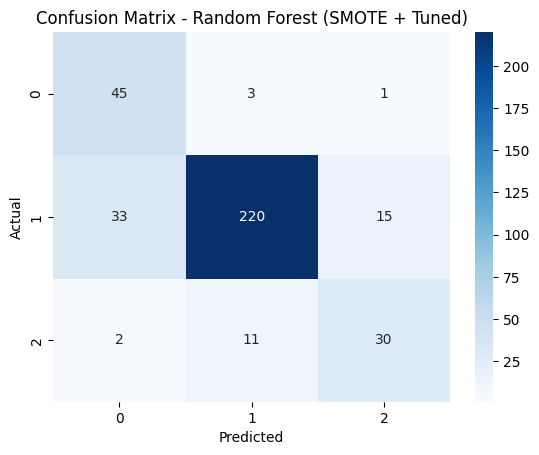

In [50]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

print("Test Accuracy:", accuracy_score(y_test, rf_pred))
print("\nClassification Report:\n", classification_report(y_test, rf_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, rf_pred)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.title("Confusion Matrix - Random Forest (SMOTE + Tuned)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [51]:
from sklearn.linear_model import LogisticRegression

param_grid_lr = {
    'C': [0.01, 0.1, 1, 10],
    'solver': ['liblinear', 'lbfgs']
}

lr = LogisticRegression(max_iter=1000, random_state=42)
grid_search_lr = GridSearchCV(estimator=lr, param_grid=param_grid_lr,
                              cv=5, n_jobs=-1, scoring='accuracy')

grid_search_lr.fit(X_train_resampled, y_train_resampled)

print("Best LR Params:", grid_search_lr.best_params_)
print("Best LR Score:", grid_search_lr.best_score_)


Best LR Params: {'C': 0.1, 'solver': 'lbfgs'}
Best LR Score: 0.75633608815427


In [52]:
lr_pred = grid_search_lr.best_estimator_.predict(X_test)


Logistic Regression Accuracy: 0.6777777777777778

Classification Report:
               precision    recall  f1-score   support

           2       0.37      0.65      0.47        49
           3       0.90      0.66      0.77       268
           4       0.44      0.79      0.57        43

    accuracy                           0.68       360
   macro avg       0.57      0.70      0.60       360
weighted avg       0.78      0.68      0.70       360



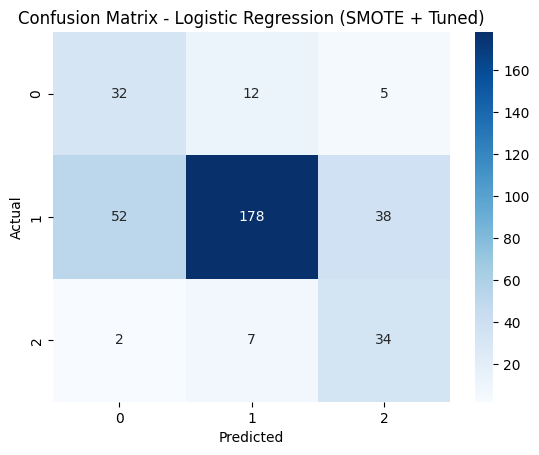

In [53]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

print("Logistic Regression Accuracy:", accuracy_score(y_test, lr_pred))
print("\nClassification Report:\n", classification_report(y_test, lr_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, lr_pred)
sns.heatmap(cm, annot=True, cmap="Blues", fmt='d')
plt.title("Confusion Matrix - Logistic Regression (SMOTE + Tuned)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Fitting 5 folds for each of 12 candidates, totalling 60 fits
 Best XGB Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
 Best XGB CV Accuracy: 0.9075984621439167
 Test Accuracy: 0.8361111111111111

Classification Report:
               precision    recall  f1-score   support

           2       0.57      0.92      0.70        49
           3       0.95      0.84      0.89       268
           4       0.72      0.72      0.72        43

    accuracy                           0.84       360
   macro avg       0.75      0.83      0.77       360
weighted avg       0.87      0.84      0.84       360



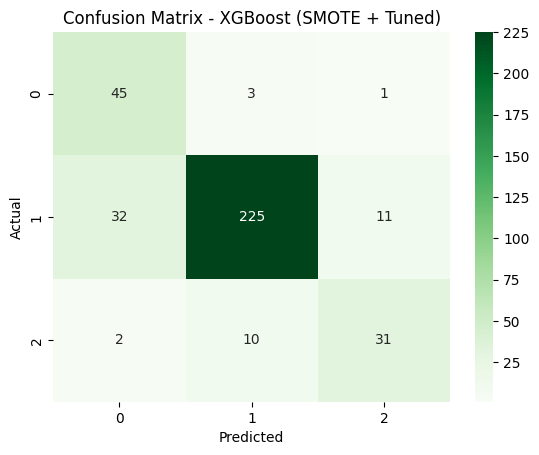

In [54]:
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt

le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

# Apply SMOTE to encoded labels
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train_encoded)

#  Define hyperparameter grid
param_grid_xgb = {
    'n_estimators': [50, 100],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1],
}

#  Initialize and tune XGBoost
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
grid_search_xgb = GridSearchCV(estimator=xgb,
                                param_grid=param_grid_xgb,
                                cv=5,
                                n_jobs=-1,
                                scoring='accuracy',
                                verbose=1)

grid_search_xgb.fit(X_train_resampled, y_train_resampled)

#  Predict and evaluate on encoded test set
xgb_pred = grid_search_xgb.best_estimator_.predict(X_test)

#  Decode predictions to original labels (2, 3, 4)
xgb_pred_original = le.inverse_transform(xgb_pred)

print(" Best XGB Parameters:", grid_search_xgb.best_params_)
print(" Best XGB CV Accuracy:", grid_search_xgb.best_score_)
print(" Test Accuracy:", accuracy_score(y_test, xgb_pred_original))
print("\nClassification Report:\n", classification_report(y_test, xgb_pred_original))

# Confusion matrix
cm = confusion_matrix(y_test, xgb_pred_original)
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix - XGBoost (SMOTE + Tuned)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()



In [55]:
rf_pred = grid_search_rf.best_estimator_.predict(X_test)
lr_pred = grid_search_lr.best_estimator_.predict(X_test)
xgb_pred = grid_search_xgb.best_estimator_.predict(X_test)

# For XGBoost, decode if you used LabelEncoder:
xgb_pred = le.inverse_transform(xgb_pred)  


In [56]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

def evaluate_model(name, y_test, y_pred):
    print(f"----- {name} -----")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))
    print("Precision:", precision_score(y_test, y_pred, average='weighted'))
    print("Recall:", recall_score(y_test, y_pred, average='weighted'))
    print()

evaluate_model("Random Forest", y_test, rf_pred)
evaluate_model("Logistic Regression", y_test, lr_pred)
evaluate_model("XGBoost", y_test, xgb_pred)


----- Random Forest -----
Accuracy: 0.8194444444444444
F1 Score: 0.8279866915637396
Precision: 0.8543660839630042
Recall: 0.8194444444444444

----- Logistic Regression -----
Accuracy: 0.6777777777777778
F1 Score: 0.7021521969998673
Precision: 0.776032931640298
Recall: 0.6777777777777778

----- XGBoost -----
Accuracy: 0.8361111111111111
F1 Score: 0.8438695720794906
Precision: 0.8674242692857733
Recall: 0.8361111111111111



#### After preprocessing, outlier removal, balancing the dataset using SMOTE, and applying hyperparameter tuning, 
#### we trained three models: Random Forest, Logistic Regression, and XGBoost to predict employee performance.
#### Among the three, XGBoost performed best across all key metrics — achieving 83.6% accuracy, with the highest F1 score (84.4%), precision, and recall.
#### Therefore, we recommend using XGBoost as the final model for predicting employee performance at INX Future Inc. It handles class imbalance well and captures complex patterns effectively.

##  Final Recommendations for Improving Employee Performance

 Final Project Recommendations
Based on the analysis and machine learning models built on INX Future Inc.’s employee data, the following practical suggestions can help improve overall employee performance:

1.  Encourage Timely Promotions
The analysis showed a clear link between the time since last promotion and employee performance. Employees who had been promoted more recently generally received better performance ratings.

 Suggestion: Establish a structured and timely promotion review system to reward growth and maintain motivation across teams.

2.  Re-evaluate Salary Hike Criteria
Among all features analyzed, salary hike percentage stood out as one of the top contributors to performance. Higher performers often had received better raises.

 Suggestion: Make salary increments more performance-driven, transparent, and consistent. This not only rewards good work but also sets a benchmark for others.

3.  Improve Work Environment
Employee satisfaction with their work environment turned out to be another strong indicator of performance. A better work environment directly correlates with better employee output.

 Suggestion: Regularly gather feedback through anonymous surveys, and actively work on improving workspace conditions, management support, and team culture.

4.  Use Model for Better Hiring Decisions
The trained XGBoost model showed the best accuracy and balanced results among the algorithms tested. It can be a powerful tool for identifying high-performing candidates even before they’re hired.

 Suggestion: Integrate this model into the hiring process to predict and shortlist candidates who are likely to perform well based on key inputs like experience, hike history, and satisfaction.

5.  Targeted Training for Specific Departments
From the department-wise performance breakdown, it was observed that some departments consistently scored lower in average ratings.

 Suggestion: Analyze these departments further and roll out personalized training, mentoring, or resource support to improve their outcomes.

## Conclusion



This project successfully combined data analysis and machine learning to uncover the key factors that influence employee performance at INX Future Inc. Using insights like promotion history, salary hike percentage, and environmental satisfaction, we built models that predict performance with high accuracy.

Among all tested algorithms, XGBoost emerged as the most effective — achieving the highest F1 score and accuracy. These findings can now guide strategic HR decisions, such as hiring, promotions, and training interventions, all based on data.